<a href="https://colab.research.google.com/github/akshitkaushik76/CODSOFT/blob/main/sms_spam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset shape: (5572, 2)

=== Multinomial Naive Bayes Evaluation ===
Accuracy: 0.9748878923766816

Confusion Matrix:


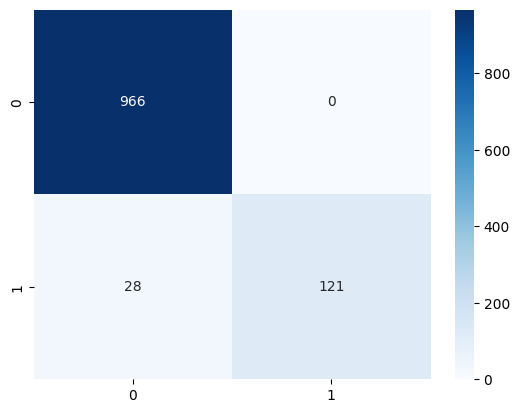


Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       966
           1       1.00      0.81      0.90       149

    accuracy                           0.97      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.98      0.97      0.97      1115


=== Logistic Regression Evaluation ===
Accuracy: 0.9721973094170404

Confusion Matrix:


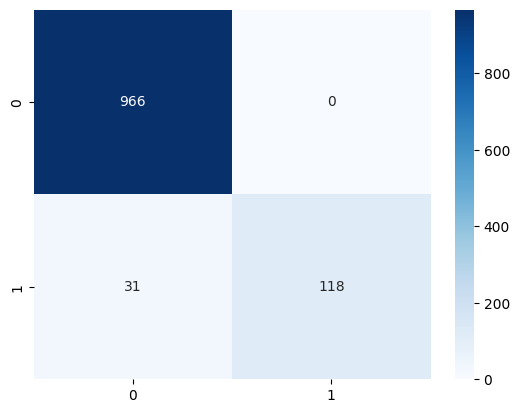


Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       1.00      0.79      0.88       149

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115


=== Linear SVM Evaluation ===
Accuracy: 0.9829596412556054

Confusion Matrix:


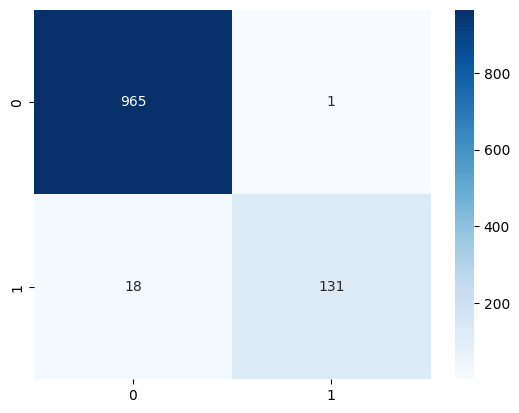


Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.99      0.88      0.93       149

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115


Example predictions:
Message: Congratulations! You've won a $1000 Walmart gift card. Reply now!
Predicted: ham

Message: Hey, are we meeting for lunch today?
Predicted: ham



In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

!wget -q https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv -O sms.tsv

data = pd.read_csv("sms.tsv", sep='\t', header=None, names=['Label', 'Message'])
print("Dataset shape:", data.shape)
data.head()

le = LabelEncoder()
data['Label_num'] = le.fit_transform(data['Label'])  # ham=0, spam=1
data['Label_num'].value_counts()

X_train, X_test, y_train, y_test = train_test_split(data['Message'], data['Label_num'], test_size=0.2, random_state=42, stratify=data['Label_num'])

tfidf = TfidfVectorizer(stop_words='english', max_features=3000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
y_pred_nb = nb_model.predict(X_test_tfidf)


lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)
y_pred_lr = lr_model.predict(X_test_tfidf)

svm_model = LinearSVC()
svm_model.fit(X_train_tfidf, y_train)
y_pred_svm = svm_model.predict(X_test_tfidf)


def evaluate_model(y_test, y_pred, model_name):
    print(f"\n=== {model_name} Evaluation ===")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.show()
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

evaluate_model(y_test, y_pred_nb, "Multinomial Naive Bayes")
evaluate_model(y_test, y_pred_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_svm, "Linear SVM")


def predict_message(msg, model, vectorizer=tfidf):
    msg_vect = vectorizer.transform([msg])
    pred = model.predict(msg_vect)[0]
    label = le.inverse_transform([pred])[0]
    return label


print("\nExample predictions:")
sample_msgs = [
    "Congratulations! You've won a $1000 Walmart gift card. Reply now!",
    "Hey, are we meeting for lunch today?"
]
for msg in sample_msgs:
    print(f"Message: {msg}\nPredicted: {predict_message(msg, lr_model)}\n")
